El análisis de componentes principales es un método que rota el conjunto de datos de tal manera que los rasgos rotados no están estadísticamente correlacionados, lo que significa que la matriz de correlación de los datos de esta representación es cero, excepto la diagonal. Esta rotación suele ir seguida de la selección de sólo un subconjunto de los nuevos rasgos, según lo importante que sean para explicar los datos

In [ ]:
  import pandas as pd

# Leer data a utiizar


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
ruta = '/content/drive/My Drive/minería de datos/tarea 4 dani'

In [ ]:
f = open('%s/heart.csv'%ruta)
heart = pd.read_csv(f)

In [ ]:
target = heart['target']
heart = heart.drop(['target'], axis=1)

In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


# Instalar libreria

In [ ]:
!pip install mglearn

     |████████████████████████████████| 542kB 4.2MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=a75446bc41b578efc2be5bdb3f550585dddacc094a6a6f488f6b5fa574a0792e
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [ ]:
import sklearn
import mglearn
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

## Explicacion PCA
## Componente 1 --> la dirección en la que las observaciones varían más
## Componente 2 -->dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente

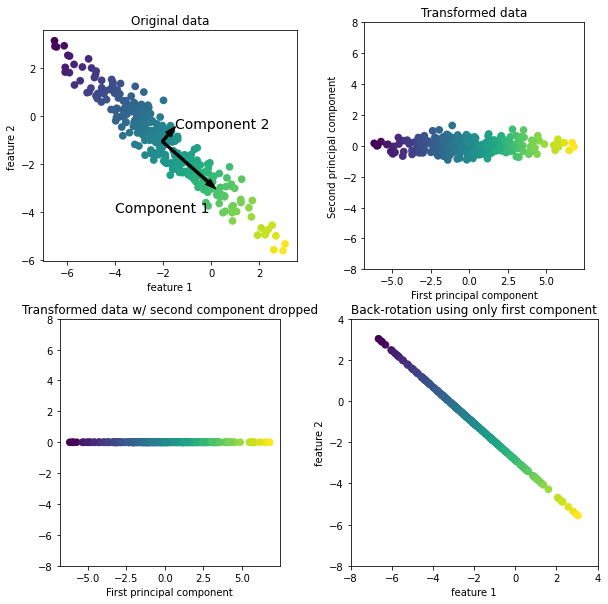

In [ ]:
# Ilustración PCA análisis
mglearn.plots.plot_pca_illustration()

In [ ]:
# Carga de información
#heart.feature_names

# Encontrar PCA de la data

In [ ]:
# Entrenamiento PCA con 2 componentes
pca = PCA(n_components=2)
pca.fit(heart)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
# Transformar la información mediante PCA
transformada = pca.transform(heart)

In [ ]:
# Comparar las estructuras
print(heart.shape)
print(transformada.shape)
heart

(303, 13)
(303, 2)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


#Crea el grafico con la trasformada de los datos

Text(0, 0.5, 'PCA 2')

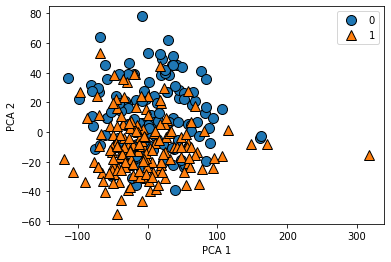

In [ ]:
# Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], target)
plt.legend([0,1],loc='best')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

#Crea el grafico con la trasformada escalada de los datos

Text(0, 0.5, 'PCA 2')

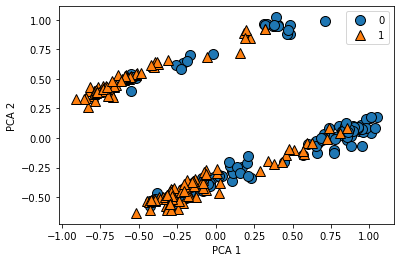

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Escalar información
escala = MinMaxScaler() 
escala.fit(heart)
escalada = escala.transform(heart)
# Entrenar PCA con la data escalada
pca.fit(escalada)
# Transformar la información mediante PCA
transformada = pca.transform(escalada)
# Gráfico en relación al objetivo
mglearn.discrete_scatter(transformada[:,0],transformada[:,1], target)
plt.legend([0,1],loc='best')
plt.gca()
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
!pip install factor_analyzer==0.2.3

###El análisis factorial exploratorio (EFA) es una técnica estadística utilizada para identificar relaciones latentes entre conjuntos de variables observadas en un conjunto de datos. En particular, el EFA trata de modelar un gran conjunto de variables observadas como combinaciones lineales de algún conjunto más pequeño de factores latentes no observados.


#Factor analyzer logra identificar las relaciones latentes entre conjuntos de variables observadas en un conjunto de datos


In [ ]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd

In [ ]:
chi_square_value, p_value = calculate_bartlett_sphericity(heart)
chi_square_value, p_value

(559.7821221803949, 2.5756642797004725e-74)

In [ ]:
kmo_all, kmo_model = calculate_kmo(heart)
kmo_model

0.6669495236713644

In [ ]:
fa = FactorAnalyzer()
fa.analyze(heart, 12, rotation = None)
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.763027
1,1.536692
2,1.222834
3,1.181146
4,1.021967
5,0.970016
6,0.862770
7,0.775945
8,0.718926
9,0.621570


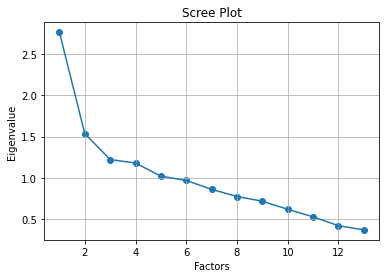

In [ ]:
plt.scatter(range(1,heart.shape[1]+1),ev)
plt.plot(range(1,heart.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

###La matriz de ponderaciones, o cargas de factores se genera a partir de un modelo de EPT describe las relaciones subyacentes entre cada variable y los factores latentes. Normalmente, se selecciona un número de factores (K) que es sustancialmente menor que el número de variables. El modelo de análisis de factores puede estimarse utilizando diversos métodos de estimación estándar, entre ellos, pero no exclusivamente, los de OLS, minres o MLE.

In [ ]:
  QAfa = FactorAnalyzer()
fa.analyze(heart, 6, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
age,0.112022,0.870366,-0.045983,-0.041538,0.246425,0.086483
sex,0.017679,-0.034348,-0.061484,0.601932,-0.246443,0.091712
cp,-0.027265,-0.035609,0.621475,-0.105243,-0.086451,0.100732
trestbps,0.170400,0.190550,0.084910,0.027580,0.271586,0.214955
chol,-0.023077,0.082649,-0.079632,-0.085733,0.568102,-0.023355
fbs,0.008544,0.065075,0.045943,0.013347,0.049941,0.687163
restecg,-0.051946,-0.059137,0.046069,-0.059443,-0.190818,-0.130982
thalach,-0.348271,-0.417855,0.493971,0.021889,0.122908,-0.014078
exang,0.221851,0.027490,-0.581588,0.168353,0.073550,0.060883
oldpeak,0.737458,0.124809,-0.134517,0.212811,0.134683,-0.010689
